# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [1]:
# Import Libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math



# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [2]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-06-01'
end_date = '2023-08-31'  # 3 months of data

# Variables to fetch
hourly_variables = ["temperature_2m", "relative_humidity_2m", "precipitation", "pressure_msl", "wind_speed_10m", "cloud_cover"]


In [3]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'temperature_unit': 'fahrenheit',
    'wind_speed_unit': 'mph',
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [4]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [5]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df_nyc = pd.DataFrame(hourly_data)
df_nyc.head()


,time,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,wind_speed_10m,cloud_cover
0,2023-06-01T00:00,59.3,95,0.0,1020.9,1.6,0
1,2023-06-01T01:00,56.9,98,0.0,1020.6,2.6,0
2,2023-06-01T02:00,55.8,99,0.0,1020.6,3.5,0
3,2023-06-01T03:00,56.8,98,0.0,1020.3,3.0,12
4,2023-06-01T04:00,54.9,100,0.0,1020.0,3.1,37


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df_nyc['time'] = pd.to_datetime(df_nyc['time'])

# Set 'time' as the index
df_nyc.set_index('time', inplace=True)

# Check for missing values
df_nyc.isnull().sum()


temperature_2m          0
relative_humidity_2m    0
precipitation           0
pressure_msl            0
wind_speed_10m          0
cloud_cover             0
dtype: int64

In [8]:
# Handle missing values (if any)
df_nyc.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/s0/mzj0z0s5637cx3xl_5yngt_00000gn/T/ipykernel_5617/2763699343.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_nyc.fillna(method='ffill', inplace=True)  # Forward fill


In [9]:
df_nyc.dtypes

temperature_2m          float64
relative_humidity_2m      int64
precipitation           float64
pressure_msl            float64
wind_speed_10m          float64
cloud_cover               int64
dtype: object

In [10]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df_nyc.describe()

,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,wind_speed_10m,cloud_cover
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,72.547736,72.686141,0.186141,1012.318524,7.036639,55.423460
std,7.485227,18.177166,0.963389,4.932468,3.501475,41.207692
min,50.600000,20.000000,0.000000,999.100000,0.000000,0.000000
25%,67.500000,59.000000,0.000000,1008.900000,4.300000,11.000000
50%,72.200000,75.000000,0.000000,1012.400000,6.500000,59.000000
75%,77.700000,88.000000,0.000000,1015.700000,9.400000,100.000000
max,93.500000,100.000000,26.900000,1025.300000,21.100000,100.000000


In [37]:
# Extract month names (first three letters)
df_nyc['month'] = df_nyc.index.month_name().str[:3]  

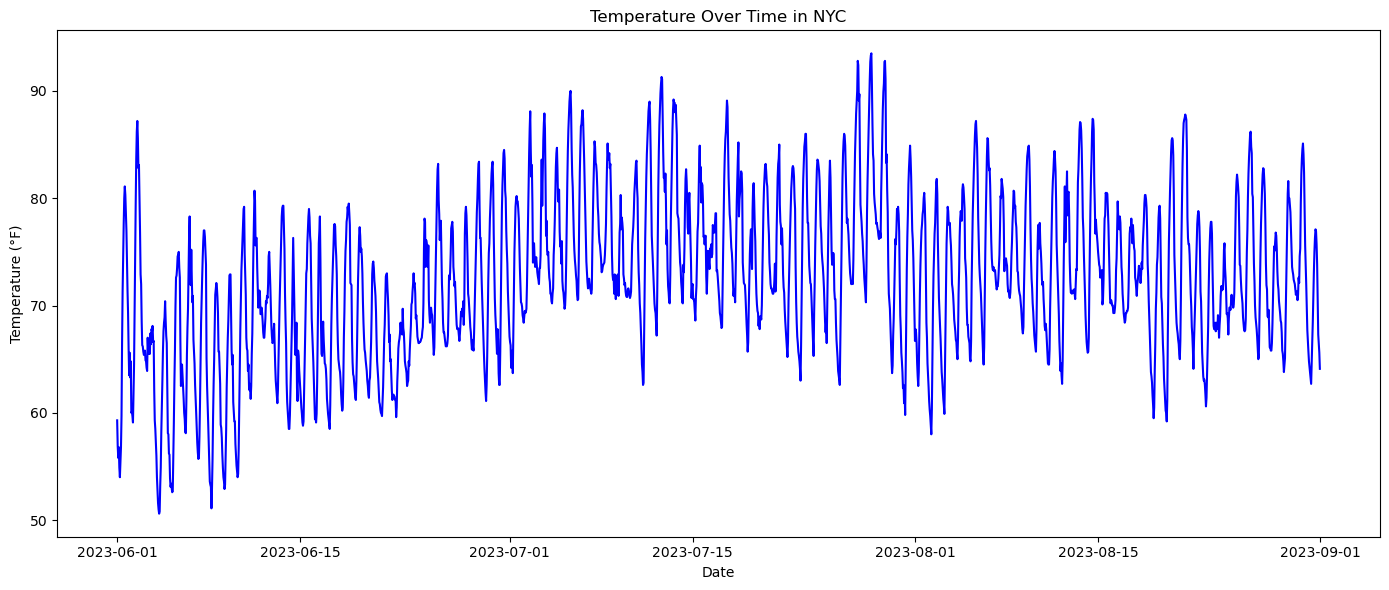

In [38]:
plt.figure(figsize=(14,6))
plt.plot(df_nyc.index, df_nyc['temperature_2m'], color='blue', label='Temperature (°F)')
plt.title('Temperature Over Time in NYC')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.tight_layout()
plt.show()

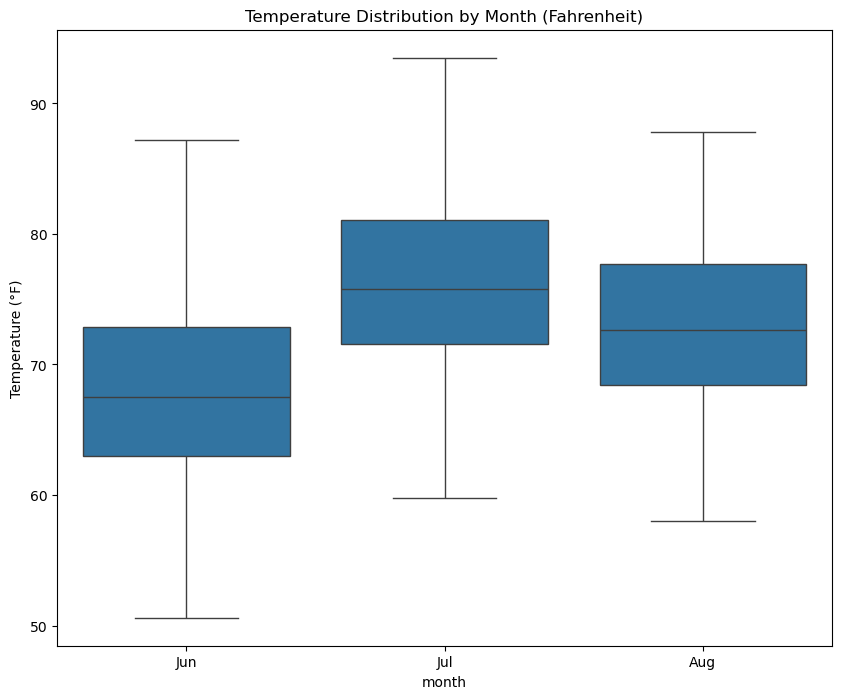

In [39]:
# Plotting Temperature Distribution by Month
plt.figure(figsize=(10,8))
sns.boxplot(x='month', y='temperature_2m', data=df_nyc, order=['Jun','Jul','Aug'])
plt.title("Temperature Distribution by Month (Fahrenheit)")
plt.ylabel("Temperature (°F)")
plt.show()

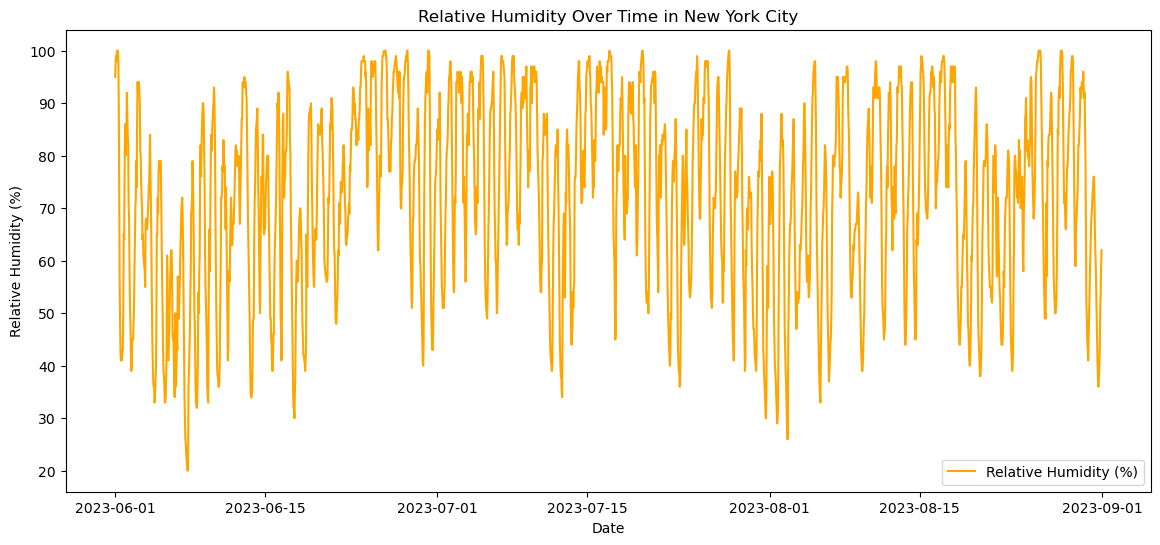

In [40]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_nyc.index, df_nyc['relative_humidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


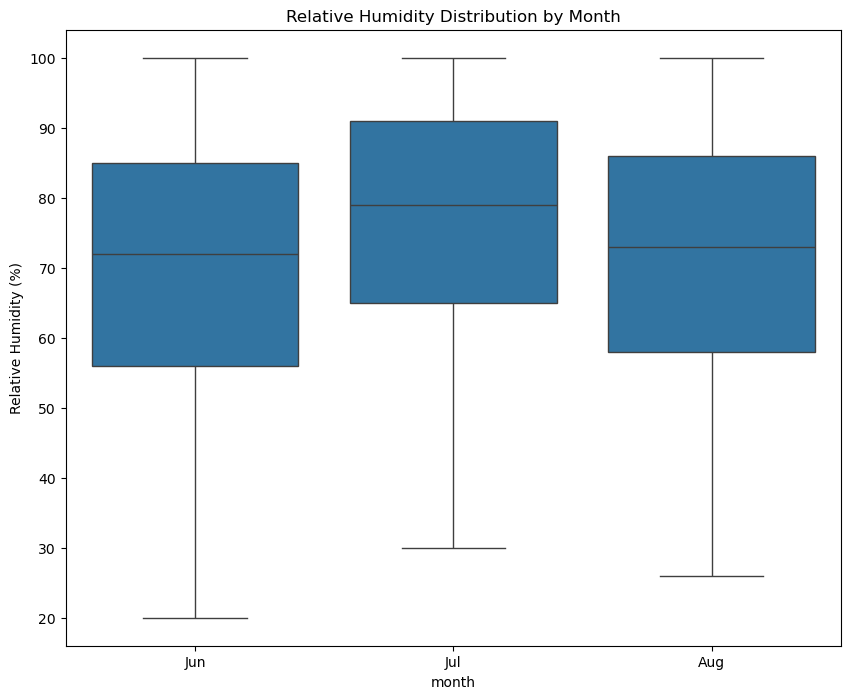

In [41]:
# Plotting Relative Humidity Distribution by Month
plt.figure(figsize=(10,8))
sns.boxplot(x='month', y='relative_humidity_2m', data=df_nyc, order=['Jun','Jul','Aug'])
plt.title("Relative Humidity Distribution by Month")
plt.ylabel("Relative Humidity (%)")
plt.show()

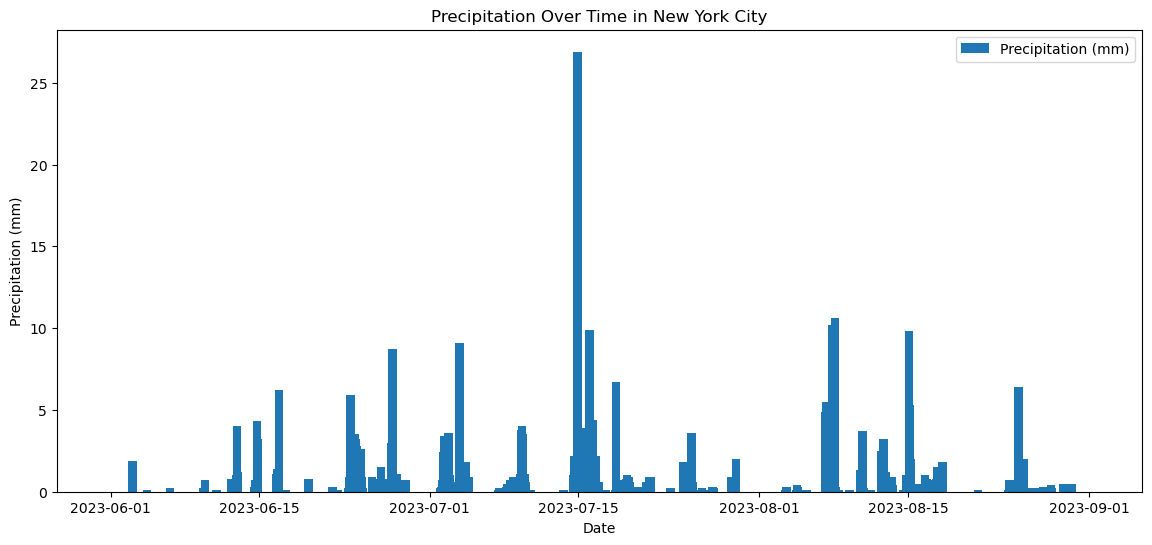

In [42]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df_nyc.index, df_nyc['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


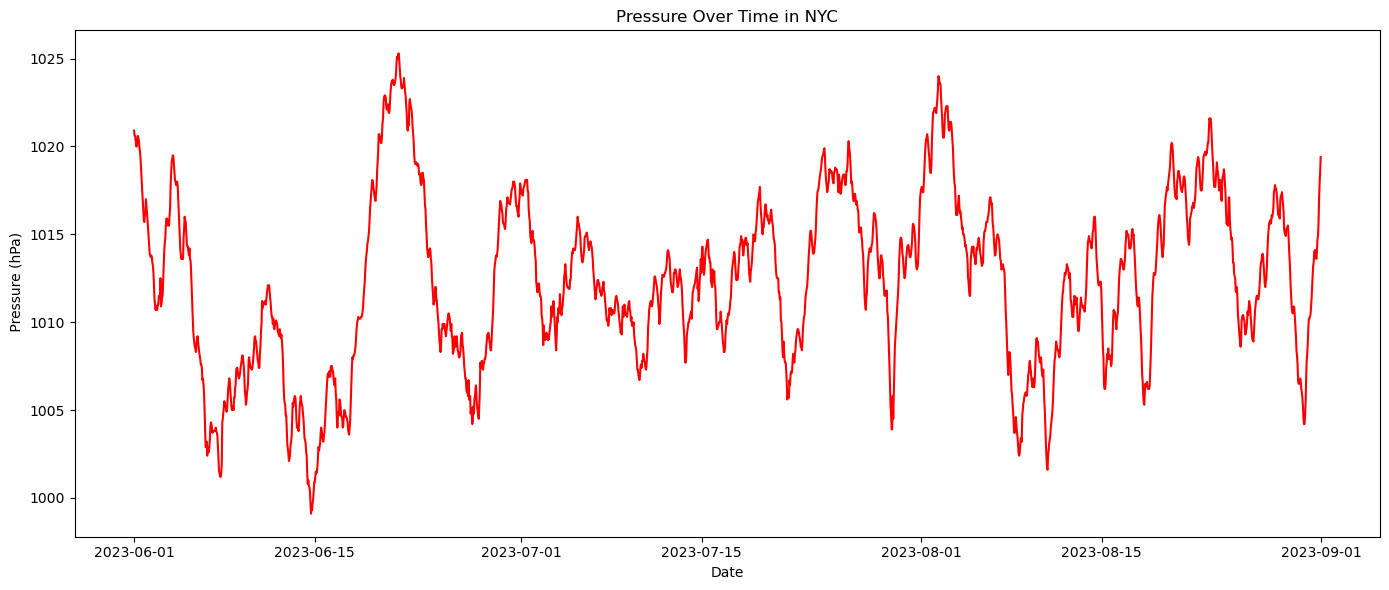

In [43]:

plt.figure(figsize=(14,6))
plt.plot(df_nyc.index, df_nyc['pressure_msl'], color='red', label='Pressure (hPa)')
plt.title('Pressure Over Time in NYC')
plt.xlabel('Date')
plt.ylabel(' Pressure (hPa)')
plt.tight_layout()
plt.show()
# Plotting Pressure by Month

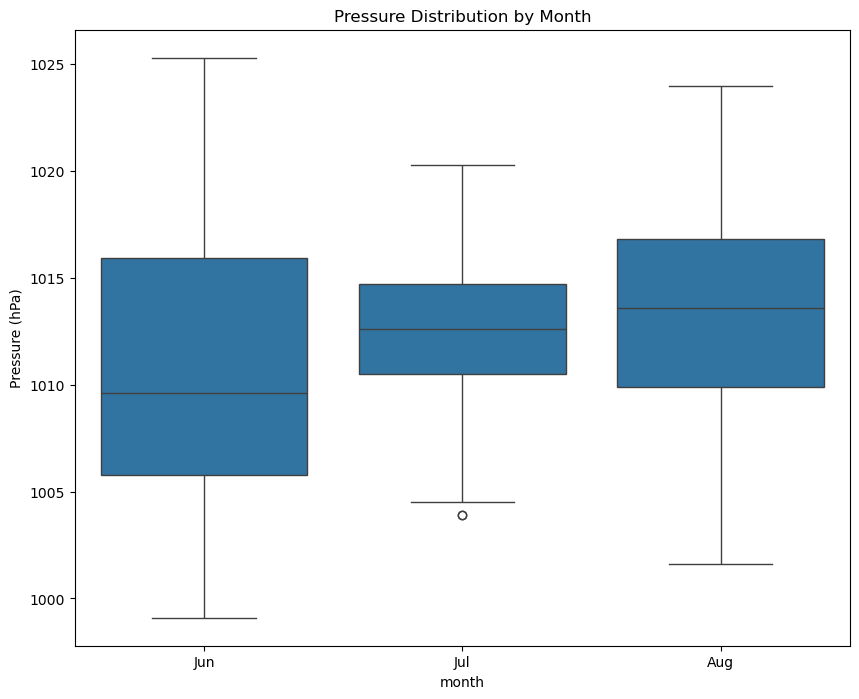

In [44]:
# Plotting Pressure Distribution by Month
plt.figure(figsize=(10,8))
sns.boxplot(x='month', y='pressure_msl', data=df_nyc, order=['Jun','Jul','Aug'])
plt.title("Pressure Distribution by Month")
plt.ylabel("Pressure (hPa)")
plt.show()

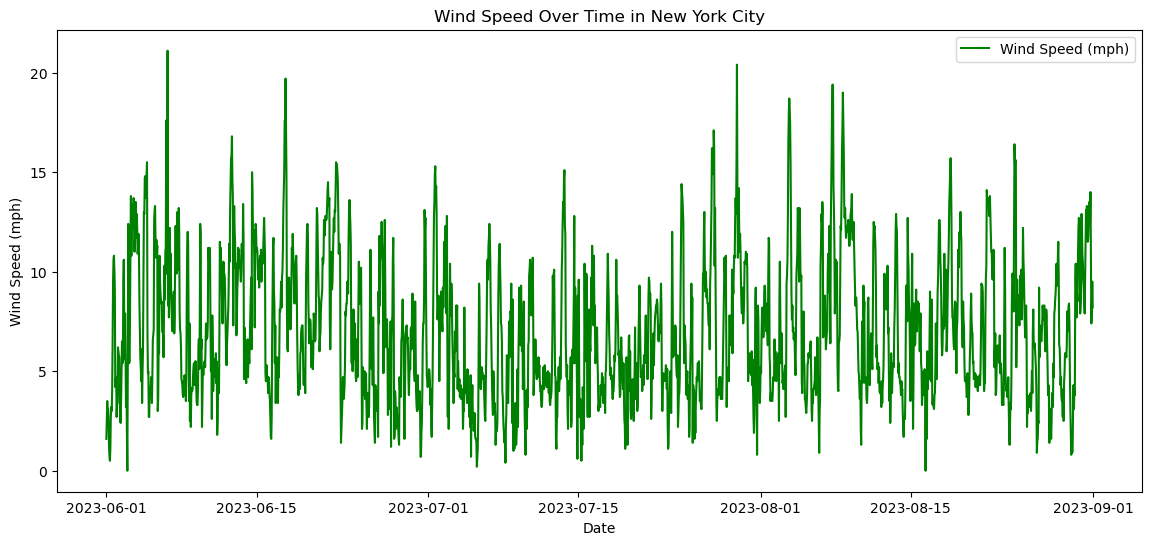

In [45]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_nyc.index, df_nyc['wind_speed_10m'], color='green', label='Wind Speed (mph)')
plt.title('Wind Speed Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()


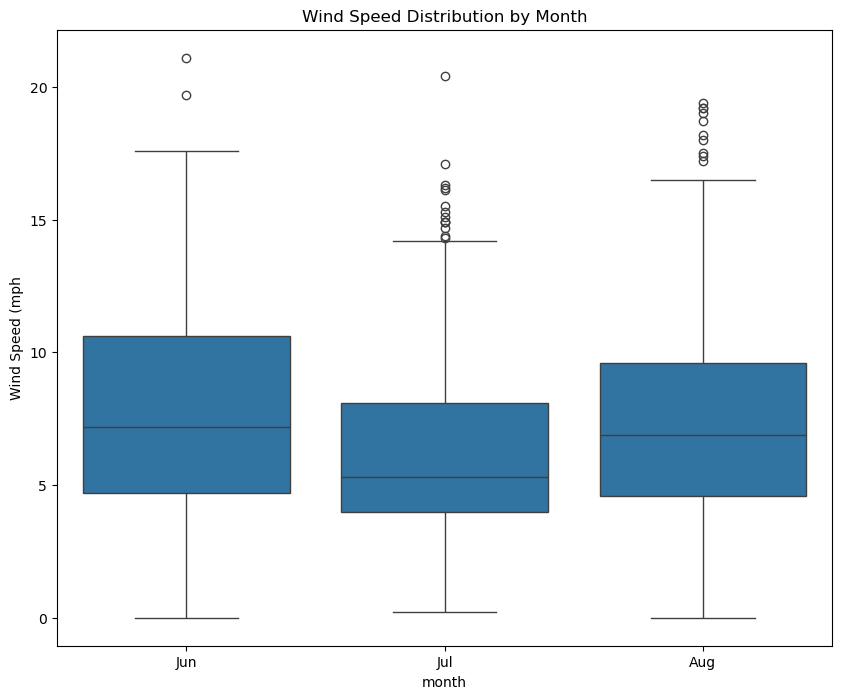

In [46]:
# Plotting Wind speed distribution
plt.figure(figsize=(10,8))
sns.boxplot(x='month', y='wind_speed_10m', data=df_nyc, order=['Jun','Jul','Aug'])
plt.title("Wind Speed Distribution by Month")
plt.ylabel("Wind Speed (mph")
plt.show()

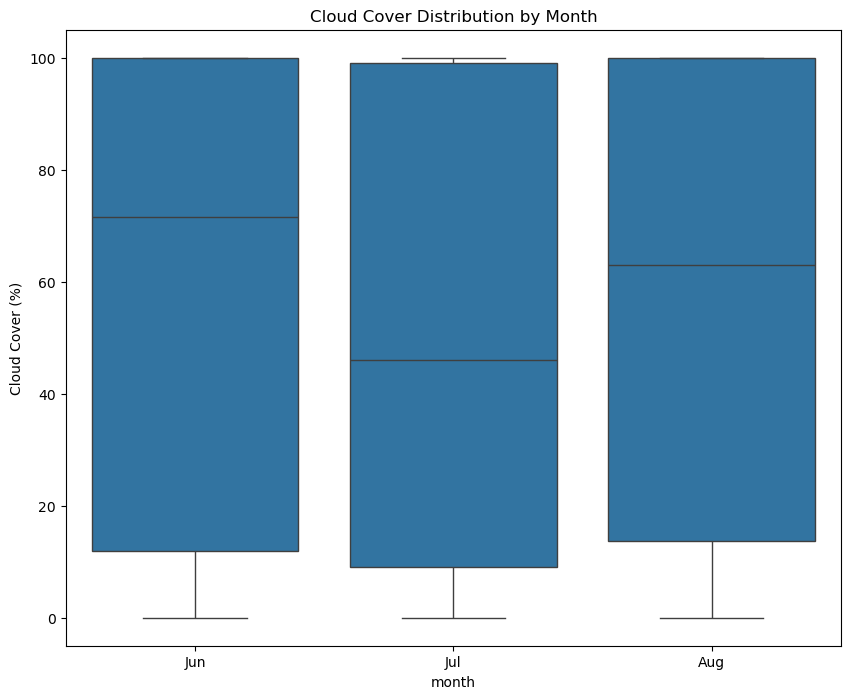

In [47]:

# Plot Cloud Cover Distribution by Month
plt.figure(figsize=(10,8))
sns.boxplot(x='month', y='cloud_cover', data=df_nyc, order=['Jun','Jul','Aug'])
plt.title("Cloud Cover Distribution by Month")
plt.ylabel("Cloud Cover (%)")
plt.show()

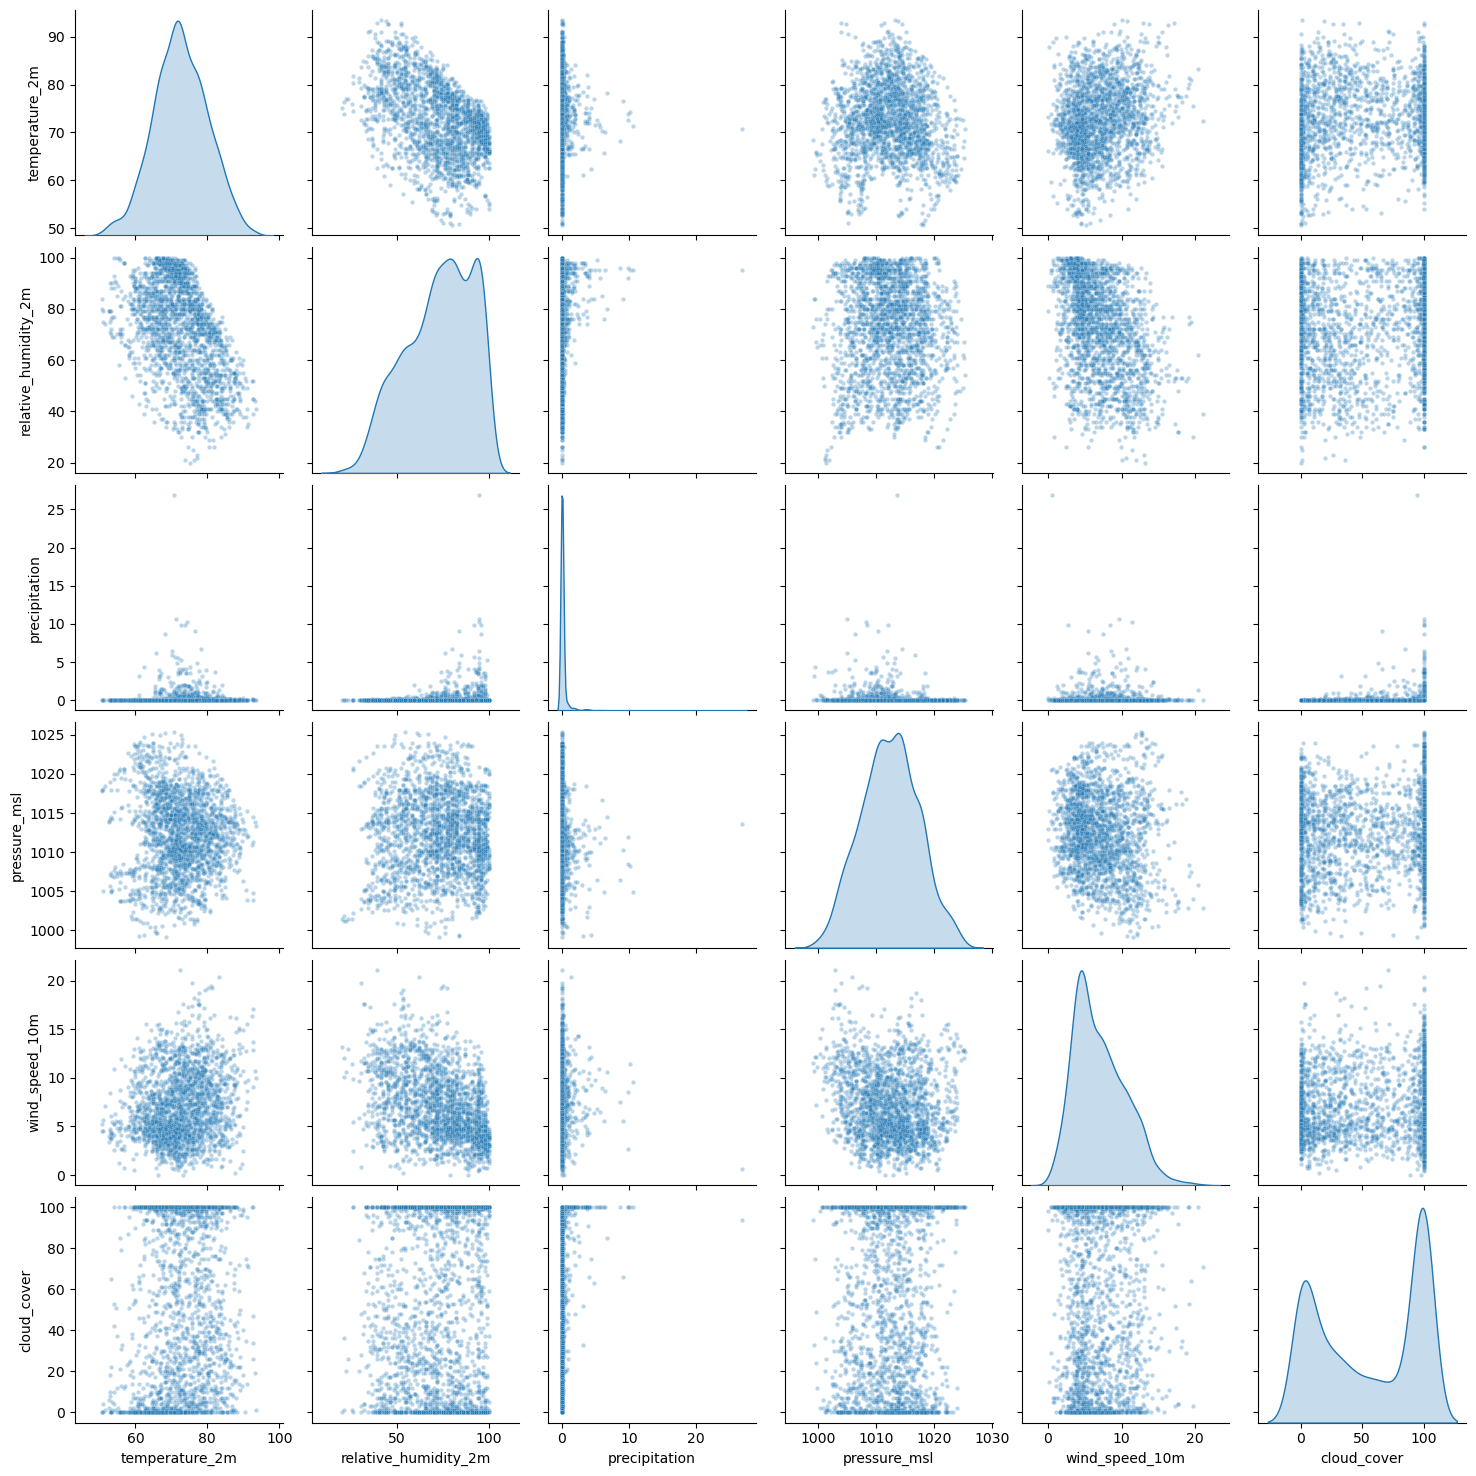

In [48]:
sns.pairplot(df_nyc[['temperature_2m','relative_humidity_2m', 'precipitation','pressure_msl', 'wind_speed_10m','cloud_cover' ]],kind='scatter',plot_kws={'s':10, 'alpha':0.3}, diag_kind='kde')
plt.show()

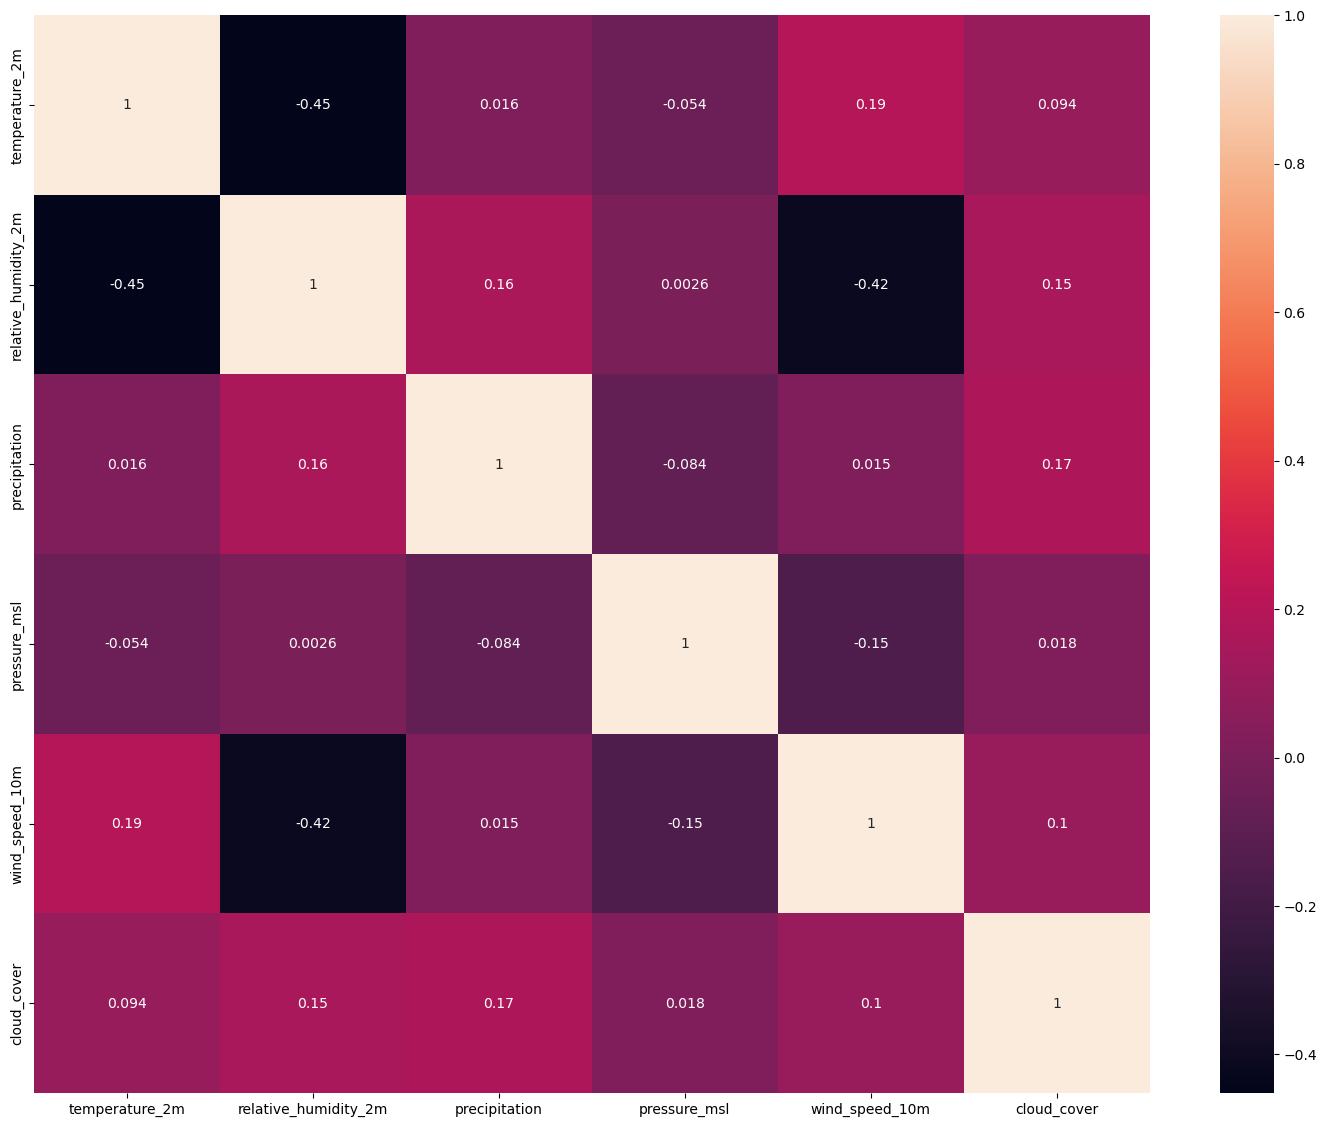

In [49]:
plt.subplots(figsize=(18,14))
sns.heatmap(df_nyc.corr(numeric_only=True), annot=True)
plt.show()

In [50]:
# Step 7: Resample Data to Daily Averages

daily_avg_nyc = df_nyc.resample('D').mean(numeric_only=True)
daily_avg_nyc.head()


,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,wind_speed_10m,cloud_cover
time,,,,,,
2023-06-01,66.929167,71.833333,0.000000,1018.675000,4.395833,19.583333
2023-06-02,72.029167,62.916667,0.000000,1012.783333,5.091667,24.500000
2023-06-03,64.900000,74.375000,0.145833,1014.779167,11.108333,94.541667
2023-06-04,59.783333,57.000000,0.004167,1016.341667,9.045833,50.625000
2023-06-05,63.916667,54.833333,0.000000,1011.579167,7.375000,54.541667


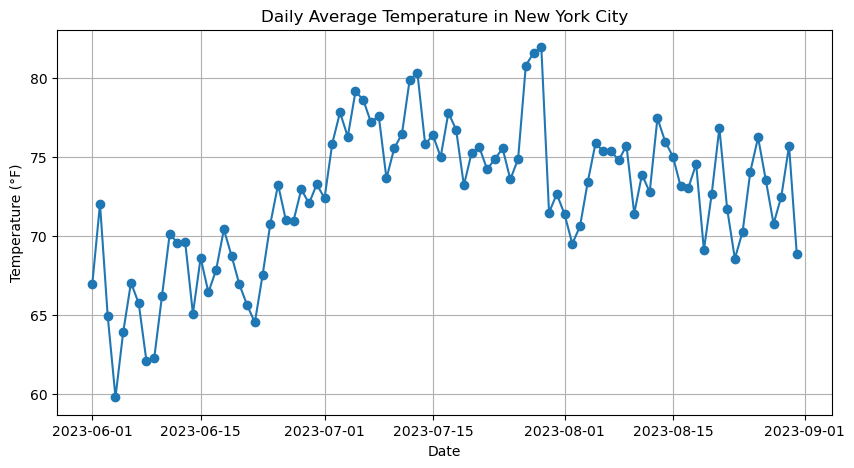

In [51]:
# Plot Daily Average Temperature for NYC

plt.figure(figsize=(10, 5))
plt.plot(daily_avg_nyc.index, daily_avg_nyc['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()


In [52]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'temperature_unit': 'fahrenheit',
    'wind_speed_unit': 'mph',
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


/var/folders/s0/mzj0z0s5637cx3xl_5yngt_00000gn/T/ipykernel_5617/4200407078.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [53]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [54]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean(numeric_only=True)
daily_avg_la.head()

,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,wind_speed_10m,cloud_cover
time,,,,,,
2023-06-01,63.020833,70.916667,0.020833,1013.083333,4.650000,95.333333
2023-06-02,63.608333,70.625000,0.000000,1014.416667,5.141667,59.250000
2023-06-03,62.654167,75.416667,0.000000,1013.245833,5.179167,13.375000
2023-06-04,63.379167,74.625000,0.000000,1011.745833,4.966667,51.208333
2023-06-05,62.083333,69.791667,0.025000,1011.866667,6.020833,90.208333


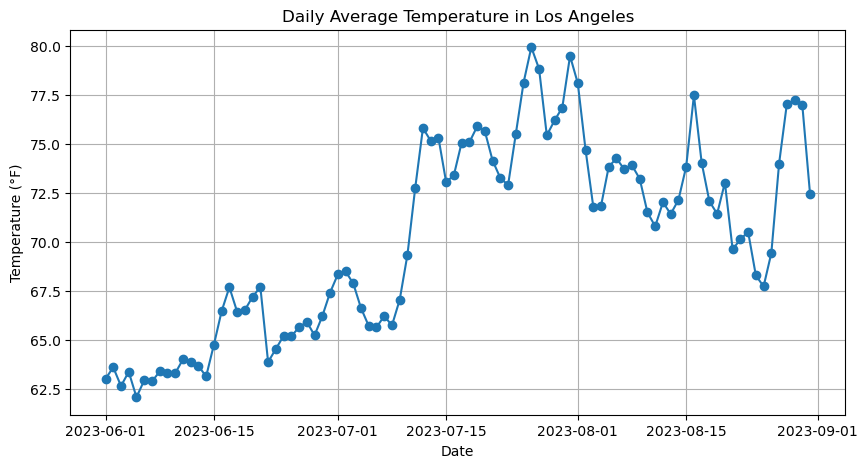

In [55]:
# Plot Daily Average Temperature for LA

plt.figure(figsize=(10, 5))
plt.plot(daily_avg_la.index, daily_avg_la['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()


In [56]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg_nyc['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


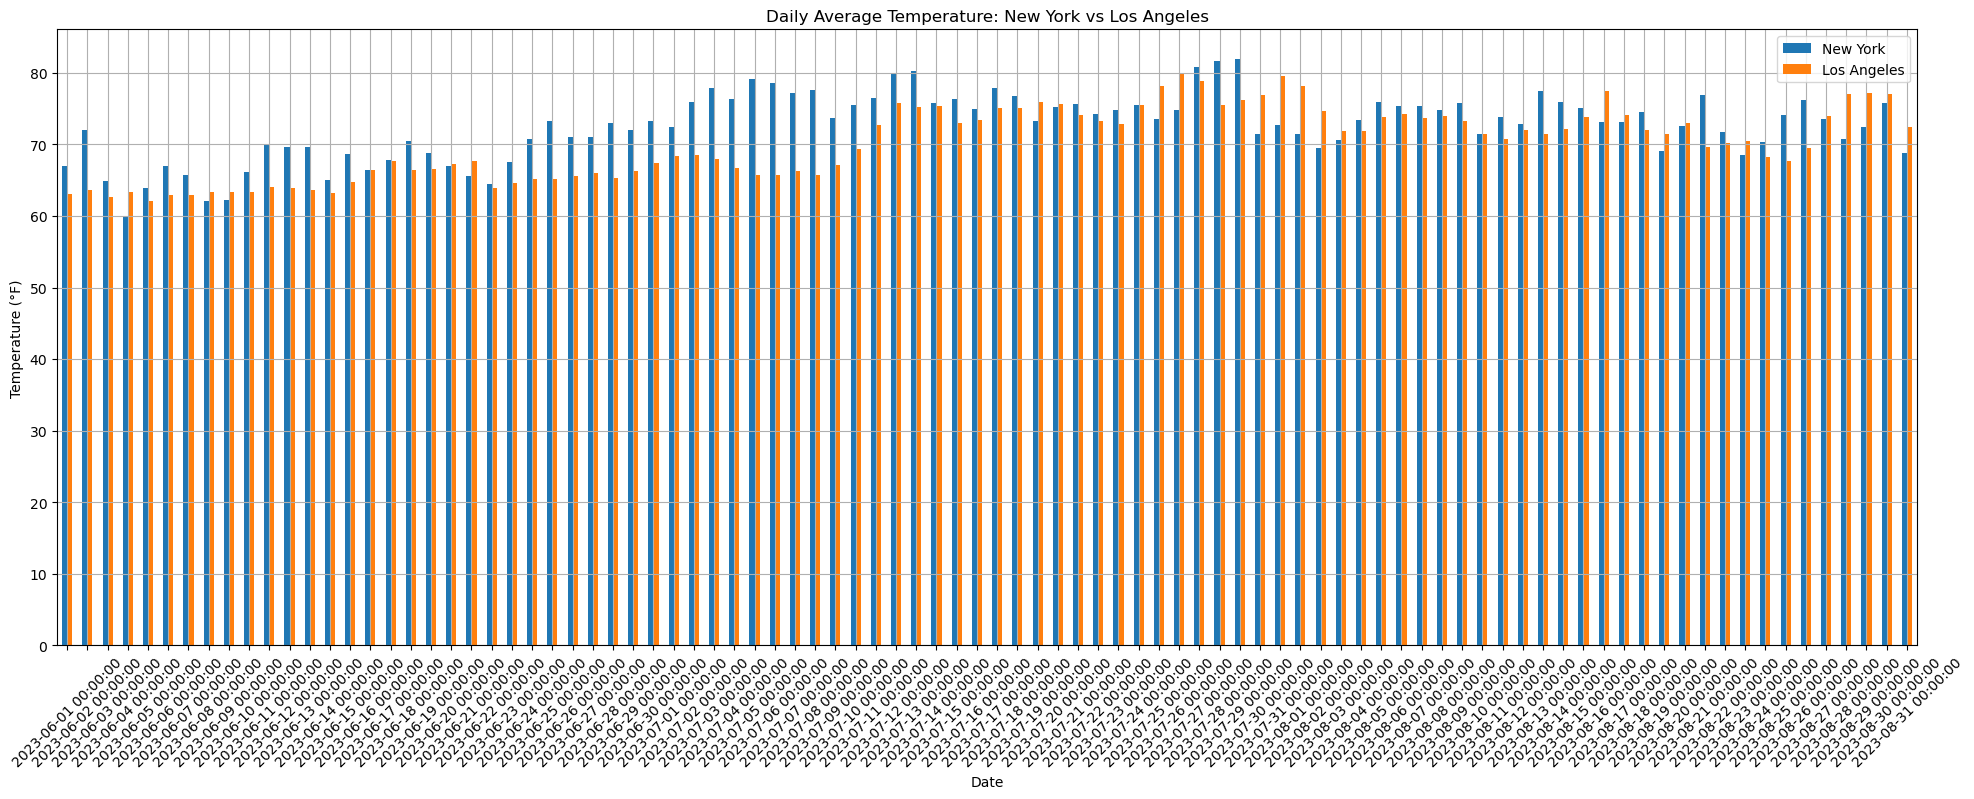

In [57]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(24, 8))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [58]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-06-01,66.929167,63.020833,-3.908333
2023-06-02,72.029167,63.608333,-8.420833
2023-06-03,64.900000,62.654167,-2.245833
2023-06-04,59.783333,63.379167,3.595833
2023-06-05,63.916667,62.083333,-1.833333
...,...,...,...
2023-08-27,73.529167,73.995833,0.466667
2023-08-28,70.766667,77.025000,6.258333
2023-08-29,72.491667,77.220833,4.729167


In [59]:
# let's check how many days New York was warmer than Los Angeles
negative_temp = combined_temp[combined_temp['Temp Difference']<0]
negative_temp.describe()

,New York,Los Angeles,Temp Difference
count,66.000000,66.000000,66.000000
mean,73.477652,69.108838,-4.368813
std,4.390445,4.480354,3.159413
min,63.916667,62.083333,-13.433333
25%,70.500000,65.339583,-6.086458
50%,74.385417,68.316667,-3.843750
75%,76.272917,73.248958,-1.937500
max,81.954167,78.825000,-0.029167


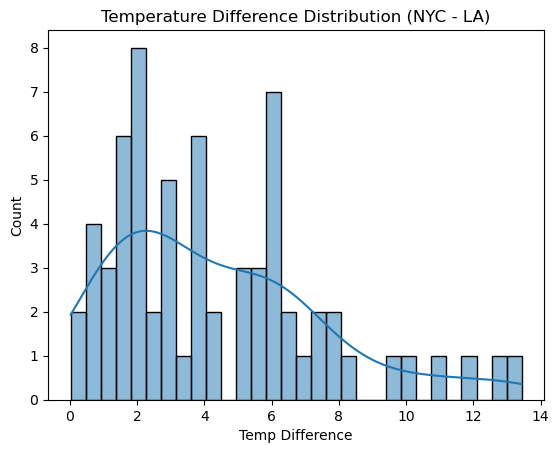

In [60]:
# plot the distribution of temperature differences
sns.histplot(negative_temp['Temp Difference']*(-1), bins=30, kde=True)
plt.title('Temperature Difference Distribution (NYC - LA)')
plt.show()

In [61]:
negative_temp.shape[0]/ combined_temp.shape[0] * 100
print(f"Percentage of days NYC was warmer than LA: {negative_temp.shape[0]/ combined_temp.shape[0] * 100:.2f}%")


Percentage of days NYC was warmer than LA: 71.74%


In [63]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df_nyc.to_csv('new_york_weather.csv')

# Save Los Angeles 
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Mini API Weather Study  
### New York City & Los Angeles : **1 June → 31 August 2023**

In this notebook we retrieved and analysed **three months of hourly weather data** for New York City (NYC) and Los Angeles (LA).  
All observations were fetched directly from the **Open‑Meteo Archive API**, covering the period **2023‑06‑01 to 2023‑08‑31** for each city.

---

### 1 · Variables explored
| Category | API field | Unit/level |
|----------|-----------|------------|
| Air temperature | `temperature_2m` | °F |
| Relative humidity | `relative_humidity_2m` | % |
| Precipitation | `precipitation` | mm  |
| Surface pressure | `surface_pressure` | hPa |
| Wind speed (10 m) | `wind_speed_10m` | mph |
| Cloud cover | `cloudcover` | % |

---
Also, since both locations are within the United States and use U.S. time zones, we specified temperature in Fahrenheit and wind speed in miles per hour to better align with local conventions.

### 2 · Visualisations produced
* **Time‑series overlays** for each variable (NYC vs LA).  
* **Pair‑plot (PR‑plot)** to show bivariate relationships across the full multivariate set.  
* **Correlation heat‑map** to highlight dependencies.  
* **Weekly resample:** average temperature per week for each city.  
* **Daily resample:** average temperature per day.

---

### 3 · Key comparative result
During summer 2023, **71.74 % of days were warmer in New York than in Los Angeles**.

---

### 4 · Take‑away
Although LA is popularly viewed as the archetypal “hot” U.S. city, the data show that for the early‑to‑late‑summer window studied here, NYC experienced higher mean daily temperatures on roughly **seven days out of ten**. Further work could examine humidity‑adjusted heat indices or extend the window to verify whether this pattern persists in other years.

# Part 2   
### London & Seattle : **1 January  → 31 December 2022**

### Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.


In [64]:
# Function to fetch weather data from Open Meteo API
def fetching_weather_data(name, latitude, longitude, timezone, start_date = '2022-01-01', end_date = '2022-12-31', hourly = ["precipitation","weather_code"]): 
    params= {"name" : name, 
        "latitude": latitude, 
        "longitude": longitude,
        "start_date": start_date, 
        "end_date": end_date,
        "hourly": hourly,
        "timezone": timezone}
    response = requests.get("https://archive-api.open-meteo.com/v1/archive" , params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        print('Data fetched successfully!')
    else:
        print(f'Failed to fetch data. Status code: {response_london.status_code}')
    df= pd.DataFrame(response.json()["hourly"])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df.fillna(method='ffill', inplace=True)
    return df

In [65]:
df_london = fetching_weather_data(name = 'London', latitude = 51.5074, longitude = -0.1278, timezone='Europe/London')
df_london.head()


Data fetched successfully!


/var/folders/s0/mzj0z0s5637cx3xl_5yngt_00000gn/T/ipykernel_5617/1671730222.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,precipitation,weather_code
time,,
2022-01-01 00:00:00,0.0,3
2022-01-01 01:00:00,0.0,3
2022-01-01 02:00:00,0.0,3
2022-01-01 03:00:00,0.0,3
2022-01-01 04:00:00,0.0,3


In [66]:
#defining a function for basic data exploriation with the main methods of EDA 
def data_exploration(df):
    print(" Shape:")
    print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")
    print("\n Column Names:")
    print(df.columns)
    
    print("\n Data Types:")
    print(df.dtypes)
    
    print("\n Missing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0].sort_values(ascending=False))

    print("\n Descriptive Stats (Numerical):")
    print(df.describe())
    
    print("\n Unique Values per Column:")
    print(df.nunique())
    

In [67]:
data_exploration(df_london)

 Shape:
Rows: 8760 | Columns: 2

 Column Names:
Index(['precipitation', 'weather_code'], dtype='object')

 Data Types:
precipitation    float64
weather_code       int64
dtype: object

 Missing Values:
Series([], dtype: int64)

 Descriptive Stats (Numerical):
       precipitation  weather_code
count    8760.000000   8760.000000
mean        0.075662      8.993950
std         0.404500     17.799183
min         0.000000      0.000000
25%         0.000000      1.000000
50%         0.000000      3.000000
75%         0.000000      3.000000
max        14.700000     73.000000

 Unique Values per Column:
precipitation    48
weather_code     12
dtype: int64


In [68]:
# Compare with Another Location (Seattle)
df_seattle = fetching_weather_data(name = 'Seattle', latitude = 47.6062, longitude = -122.3321, timezone='America/Los_Angeles')
df_seattle.head()

Data fetched successfully!


/var/folders/s0/mzj0z0s5637cx3xl_5yngt_00000gn/T/ipykernel_5617/1671730222.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,precipitation,weather_code
time,,
2022-01-01 00:00:00,0.0,1
2022-01-01 01:00:00,0.0,3
2022-01-01 02:00:00,0.0,3
2022-01-01 03:00:00,0.0,3
2022-01-01 04:00:00,0.0,3


In [69]:
data_exploration(df_seattle)

 Shape:
Rows: 8760 | Columns: 2

 Column Names:
Index(['precipitation', 'weather_code'], dtype='object')

 Data Types:
precipitation    float64
weather_code       int64
dtype: object

 Missing Values:
Series([], dtype: int64)

 Descriptive Stats (Numerical):
       precipitation  weather_code
count    8760.000000   8760.000000
mean        0.129132     12.316210
std         0.463708     21.333617
min         0.000000      0.000000
25%         0.000000      1.000000
50%         0.000000      3.000000
75%         0.000000      3.000000
max         7.700000     75.000000

 Unique Values per Column:
precipitation    52
weather_code     12
dtype: int64


In [70]:
def weekly(df):
    df_week = df[['precipitation']].resample('W').sum()
    df_week['month'] = df_week.index.month_name().str[:3]
    return df_week

In [71]:
weekly_london = weekly(df_london)
weekly_seattle = weekly(df_seattle)

In [72]:
data_exploration(weekly_london)

 Shape:
Rows: 53 | Columns: 2

 Column Names:
Index(['precipitation', 'month'], dtype='object')

 Data Types:
precipitation    float64
month             object
dtype: object

 Missing Values:
Series([], dtype: int64)

 Descriptive Stats (Numerical):
       precipitation
count      53.000000
mean       12.505660
std        13.632476
min         0.000000
25%         3.100000
50%         7.700000
75%        18.000000
max        67.800000

 Unique Values per Column:
precipitation    46
month            12
dtype: int64


In [73]:
weekly_london['month'] = weekly_london.index.month_name().str[:3]
weekly_seattle['month'] = weekly_seattle.index.month_name().str[:3]
# Adding month names for better visualization

In [74]:
print(weekly_london.describe(),weekly_seattle.describe())

       precipitation
count      53.000000
mean       12.505660
std        13.632476
min         0.000000
25%         3.100000
50%         7.700000
75%        18.000000
max        67.800000        precipitation
count      53.000000
mean       21.343396
std        23.928937
min         0.000000
25%         2.100000
50%        10.800000
75%        35.200000
max       108.800000


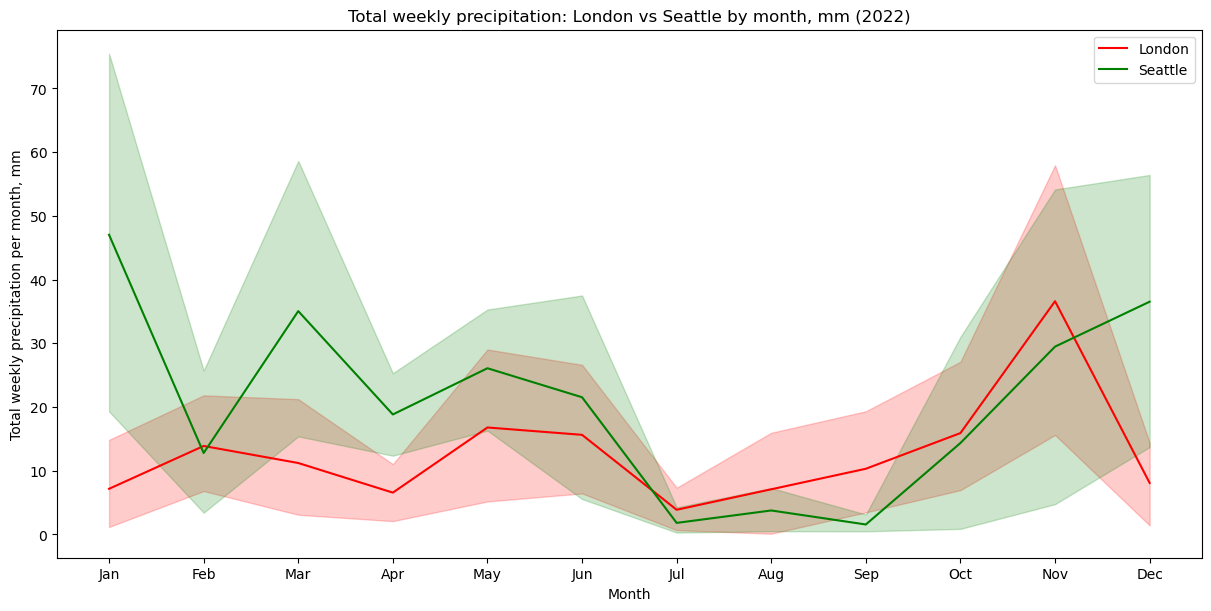

In [75]:
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)
sns.lineplot(x='month', y='precipitation', data=weekly_london, color='red',  label='London', ax=ax)
sns.lineplot(x='month', y='precipitation', data=weekly_seattle, color='green', label='Seattle', ax=ax)                                           
ax.set_xlabel('Month')
ax.set_ylabel('Total weekly precipitation per month, mm')
ax.set_title('Total weekly precipitation: London vs Seattle by month, mm (2022)')
plt.show()
# plotting the weekly precipitation data for both cities

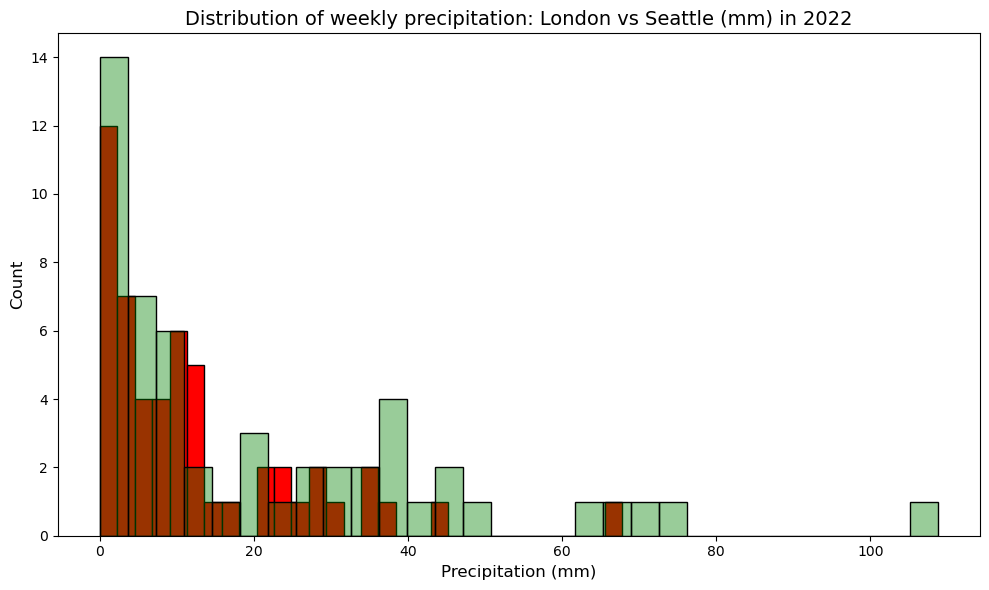

In [76]:
plt.figure(figsize=(10,6))
#  weekly precipitation in London in 2022 histogram
sns.histplot(weekly_london['precipitation'],bins=30, color='red',alpha=1, label='Weekly precipitation in London, mm')
#  weekly precipitation in Seattle in 2022 histogram
sns.histplot(weekly_seattle['precipitation'],bins=30,color='green', alpha=0.4,common_norm=False, label='Weekly precipitation in Seattle, mm')
plt.xlabel("Precipitation (mm)", fontsize=12)
plt.ylabel("Count",  fontsize=12)
plt.title("Distribution of weekly precipitation: London vs Seattle (mm) in 2022", fontsize=14)
plt.tight_layout()
plt.show()
# weekly precipitation distribution in both cities in 2022 histogram

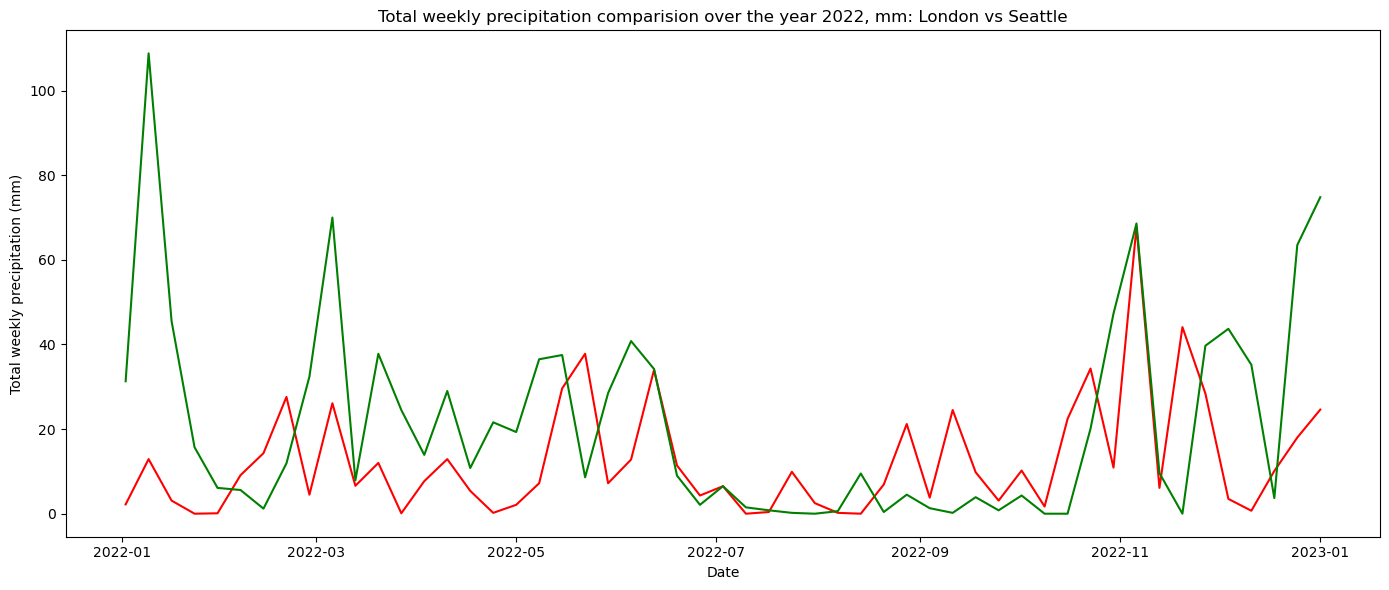

In [77]:
plt.figure(figsize=(14,6))
plt.plot(weekly_london.index, weekly_london['precipitation'], color='red', label='Total precipitation in London mm')
plt.plot(weekly_seattle.index, weekly_seattle['precipitation'], color='green', label='Total precipitation in Seattle, mm')
plt.title('Total weekly precipitation comparision over the year 2022, mm: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Total weekly precipitation (mm)')
plt.tight_layout()
plt.show()
# plotting the weekly precipitation data for both cities

In [78]:
# calculating the percentage of dry days in London 
print(f"The percentage of dry days was {round(len(df_london[df_london['precipitation'] == 0.0])/len(df_london['precipitation'])*100, 2)} % of total days in 2022 in London")
#  and Seattle
print(f"The percentage of dry days was {round(len(df_seattle[df_seattle['precipitation'] == 0.0])/len(df_seattle['precipitation'])*100, 2)} % of total days in 2022 in Seattle")

The percentage of dry days was 85.96 % of total days in 2022 in London
The percentage of dry days was 80.06 % of total days in 2022 in Seattle


In [79]:
print(f"The total amount of dry days in London in 2022: {round(len(df_london[df_london['precipitation'] == 0.0])/24)}")
print(f"The total amount of dry days in Seattle in 2022: {round(len(df_seattle[df_seattle['precipitation'] == 0.0])/24)}")

The total amount of dry days in London in 2022: 314
The total amount of dry days in Seattle in 2022: 292


In [80]:
weekly_london_code = df_london[["weather_code"]].resample('W').agg(lambda x: x.mode().iat[0])
weekly_seattle_code = df_seattle[["weather_code"]].resample('W').agg(lambda x: x.mode().iat[0])
# resampling the data to weekly to get the most common weather code for each week

In [81]:
weekly_seattle_code.describe()

,weather_code
count,53.000000
mean,2.150943
std,1.364329
min,0.000000
25%,0.000000
50%,3.000000
75%,3.000000
max,3.000000


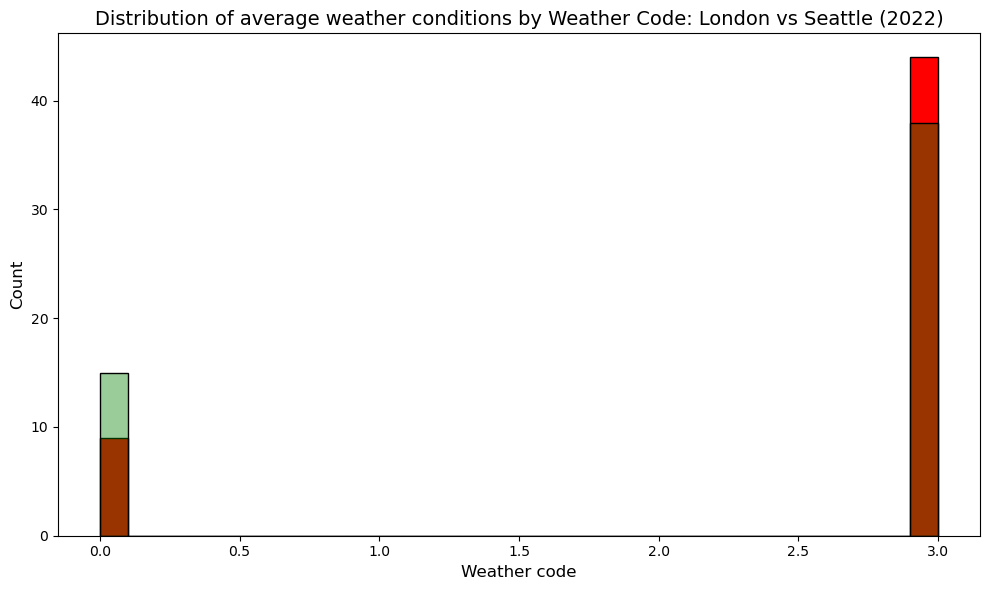

In [82]:
plt.figure(figsize=(10,6))
# average weather condition by code in London in 2022 histogram
sns.histplot(weekly_london_code['weather_code'], bins=30, color='red',alpha=1, label='Average weather condition in London in 2022')
#  average weather condition by code in Seattle in 2022 histogram
sns.histplot(weekly_seattle_code['weather_code'],bins=30,color='green', alpha=0.4, label='Average weather condition in Seattle in 2022')
plt.xlabel("Weather code", fontsize=12)
plt.ylabel("Count",  fontsize=12)
plt.title("Distribution of average weather conditions by Weather Code: London vs Seattle (2022)", fontsize=14)
plt.tight_layout()
plt.show()

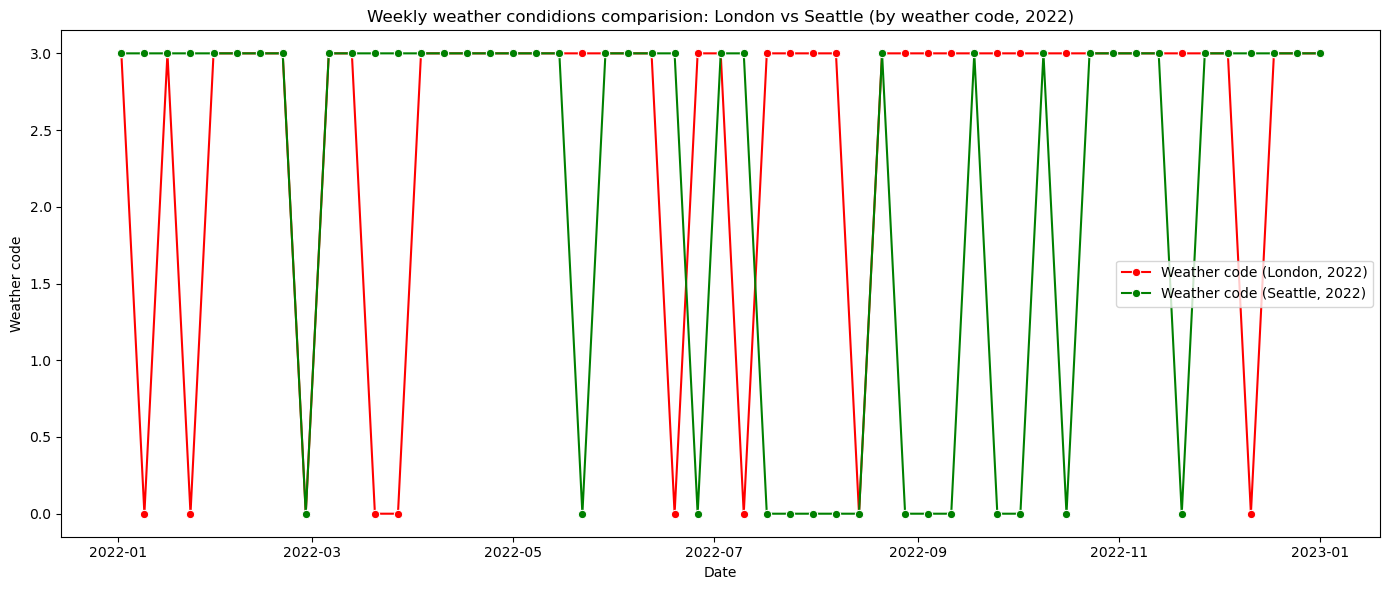

In [83]:

plt.figure(figsize=(14,6))
sns.lineplot(x=weekly_london.index, y=weekly_london_code['weather_code'], data= weekly_london_code, color='red', marker ='o' ,label='Weather code (London, 2022)')
sns.lineplot(x= weekly_seattle.index, y= weekly_seattle_code['weather_code'], data = weekly_seattle_code, color='green', marker = 'o', label='Weather code (Seattle, 2022)')
plt.title('Weekly weather condidions comparision: London vs Seattle (by weather code, 2022)')
plt.xlabel('Date')
plt.ylabel('Weather code')
plt.tight_layout()
plt.show()
# plotting the weekly weather code comparisin for both cities 

In [84]:
# calculating the percentage of dry days in London 
print(f"The percentage of dry days was {round(len(df_london[df_london['precipitation'] == 0.0])/len(df_london['precipitation'])*100, 2)} % of total days in 2022 in London")
#  and Seattle
print(f"The percentage of dry days was {round(len(df_seattle[df_seattle['precipitation'] == 0.0])/len(df_seattle['precipitation'])*100, 2)} % of total days in 2022 in Seattle")

The percentage of dry days was 85.96 % of total days in 2022 in London
The percentage of dry days was 80.06 % of total days in 2022 in Seattle


In [86]:
print(f"The average weather code for London in 2022 was {weekly_london_code['weather_code'].mode().iat[0]}.")
print(f"The average weather code for Seattle in 2022 was {weekly_seattle_code['weather_code'].mode().iat[0]}.")

The average weather code for London in 2022 was 3.
The average weather code for Seattle in 2022 was 3.


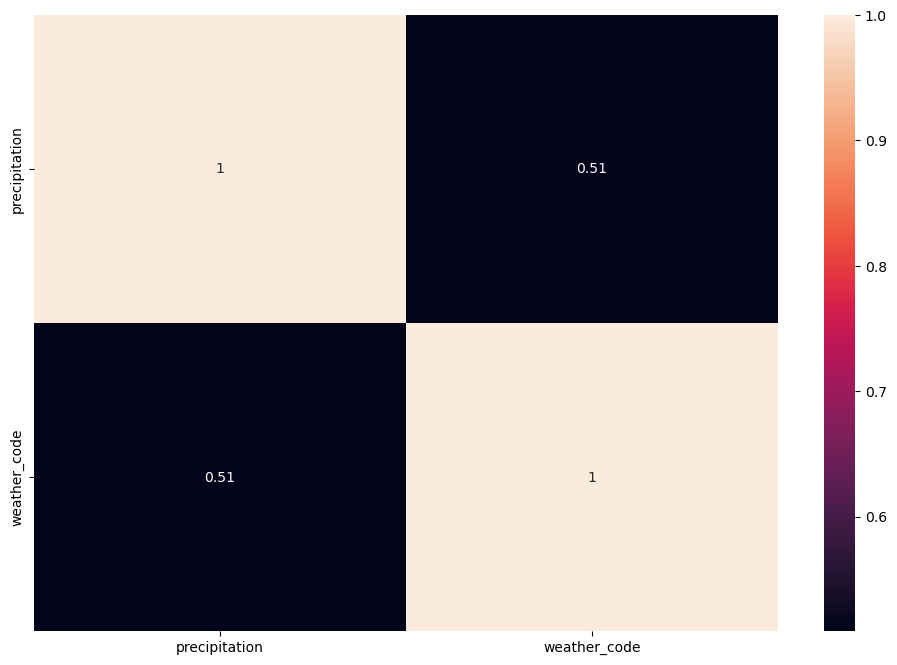

In [92]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_london.corr(numeric_only=True), annot=True)
plt.show()
# plotting the correlation matrix for London weather data

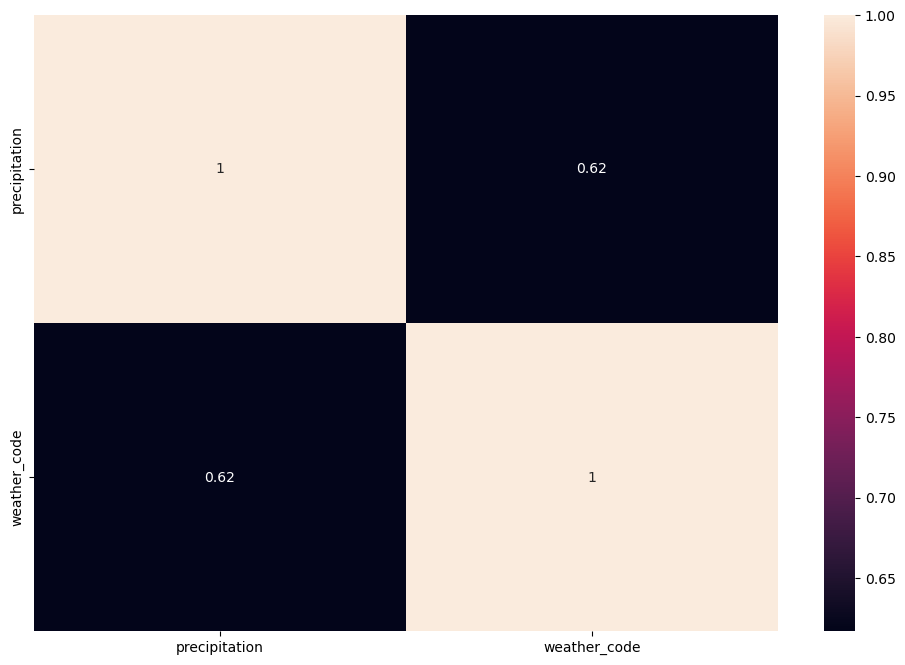

In [93]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_seattle.corr(numeric_only=True), annot=True)
plt.show()

## Part 2 Conclusion 
### Automated Pipeline & Comparative Precipitation and Weather Condition Analysis  
### London vs Seattle · **Full Year 2022**

In this part of the project we **automated API data fetching and the EDA workflow** by introducing three reusable helpers:

* **`fetching_weather_data()`** – wraps the Open‑Meteo Archive API; requires  
  `city_name`, `latitude`, `longitude`, `timezone`, `start_date`, `end_date`, and `hourly_variables`.  
  It converts the time column to `datetime`, checks the API response status, and returns a cleaned DataFrame.

* **`data_exploration()`** – prints dataset structure, checks for missing values, and provides a basic statistical overview.

* **`weekly()`** – resamples numeric data to weekly frequency (using `sum()`), adds a month‑label column for temporal grouping.  
  This modular approach **cuts** boiler‑plate and **guarantees** that every new city or variable can be processed with a *single* function call.

---

### 1 · Variables analysed
We focused on two core metrics for each city:

| Category | Open‑Meteo field | Aggregation |
|----------|------------------|-------------|
| Precipitation | `precipitation` | **Weekly sum** (`resample('W').sum()`) |
| Weather code | `weather_code` | Weekly mode (`resample('W').agg(lambda x: x.mode().iat[0])`) |

*A complete list of available variables and the **weather‑code legend**
(0 = *clear sky*, 3 = *overcast*, …) can be found in the
[Open‑Meteo documentation](https://open-meteo.com/en/docs#weathercode).*  

---

### 2 · Key findings (London vs Seattle, 2022)

| Metric | London | Seattle |
|--------|--------|---------|
| **Dry‑day share** | **85.96 %** (314 days) | **80.06 %** (292 days) |
| **Dominant weather codes** | 0 & 3 | 0 & 3 |
| **Mode of weekly codes** | 3 | 3 |

*Interpretation:* Seattle records more frequent rainfall weeks; London shows a higher proportion of rain‑free days.  
Both cities, however, spend the majority of the year under either **clear sky (code 0)** or **broken/overcast cloud (code 3)** conditions. Averaging those two dominant codes still yields **≈ 3**, reinforcing the prevalence of overcast weather in both locales.

---

### 3 · Visual evidence produced
* **Weekly precipitation bars** – clear delta: Seattle’s totals consistently exceed London’s.  
* **Weekly mean‑temperature lines** – London’s winter trough vs Seattle’s milder swing.  
* **Weather‑code histogram** – twin peaks at 0 and 3, supporting the numeric summary.  
* **Correlation heat‑map** – confirms the expected correlation between the `precipitation` level and the general weather conditions (represented by their codes).